# Listing 5.1 Calculating dividend growth

In [5]:
def calculate_dividend_growth_rate(stock):
    try:
        dividends = stock.dividends
        if dividends.empty:
            return None, None

        dividends_by_year = dividends.resample('YE').sum()

        if len(dividends_by_year) > 1:
            first_year = dividends_by_year.index[0].year
            last_year = dividends_by_year.index[-1].year
            first_dividend = dividends_by_year.iloc[0]
            last_dividend = dividends_by_year.iloc[-1]
            num_years = last_year - first_year
            cagr = ((last_dividend / first_dividend) ** (1 / num_years)) - 1
        else:
            cagr = None

        # Determine payout frequency
        payouts_per_year = dividends.resample('YE').count().mean()
        if payouts_per_year > 3.5:
            payout_frequency = "Quarterly"
        elif payouts_per_year > 1.5:
            payout_frequency = "Semi-Annual"
        elif payouts_per_year > 0.5:
            payout_frequency = "Annual"
        else:
            payout_frequency = "Irregular"

        return cagr, payout_frequency
    except Exception as e:
        print(f"Error processing {stock}: {e}")
        return None, None

In [ ]:
import yfinance as yf
stock = yf.Ticker("AAPL")
calculate_dividend_growth_rate(stock)

# Listing 5.2 Executing Code

In [7]:
import requests
import pandas as pd
import yfinance as yf
from io import StringIO

def get_sp500_tickers():
    url = "https://en.wikipedia.org/wiki/List_of_S%26P_500_companies" #A
    response = requests.get(url) #A
    tables = pd.read_html(StringIO(response.text)) #A
    sp500_table = tables[0]  #A
    return sp500_table["Symbol"].tolist() #A

def get_stocks_with_dividends_and_high_market_cap(tickers, market_cap_threshold):
    data = []
    for ticker in tickers: #B
        try:
            stock = yf.Ticker(ticker) #B
            info = stock.info #B
            if info.get("dividendYield") and info.get("marketCap") >= market_cap_threshold:
                cagr, payout_frequency = calculate_dividend_growth_rate(stock) #C
                data.append({
                    "Ticker": ticker, #C
                    "Name": info.get("longName", "N/A"), #C
                    "Market Cap": info.get("marketCap"), #C
                    "Dividend Yield": info.get("dividendYield"), #C
                    "Sector": info.get("sector", "N/A"), #C
                    "payoutRatio": info.get("payoutRatio", "N/A"), #C
                    "dividendRate": info.get("dividendRate", "N/A"), #C
                    # "payout_ratio": calculate_payout_ratio(stock) #C,
                    "cagr": cagr, #C
                    "payout_frequency": payout_frequency, #C
                })
        except Exception as e:
            print(f"Error processing {ticker}: {e}")

    return pd.DataFrame(data)


In [8]:
sp500_tickers = get_sp500_tickers()
print(f"Retrieved {len(sp500_tickers)} S&P 500 tickers.")

# Define market cap threshold (e.g., $200 billion)
market_cap_threshold = 200e9  # 200 billion USD

# Get the filtered stocks
results = get_stocks_with_dividends_and_high_market_cap(sp500_tickers, market_cap_threshold)

Retrieved 503 S&P 500 tickers.
Error processing OMC: Too Many Requests. Rate limited. Try after a while.
Error processing ON: Too Many Requests. Rate limited. Try after a while.
Error processing OKE: Too Many Requests. Rate limited. Try after a while.
Error processing ORCL: Too Many Requests. Rate limited. Try after a while.
Error processing OTIS: Too Many Requests. Rate limited. Try after a while.
Error processing PCAR: Too Many Requests. Rate limited. Try after a while.
Error processing PKG: Too Many Requests. Rate limited. Try after a while.
Error processing PLTR: Too Many Requests. Rate limited. Try after a while.
Error processing PANW: Too Many Requests. Rate limited. Try after a while.
Error processing PARA: Too Many Requests. Rate limited. Try after a while.
Error processing PH: Too Many Requests. Rate limited. Try after a while.
Error processing PAYX: Too Many Requests. Rate limited. Try after a while.
Error processing PAYC: Too Many Requests. Rate limited. Try after a while.
E

401 Client Error: Unauthorized for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/TJX?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=TJX&crumb=Edge%3A+Too+Many+Requests


Error processing TJX: 'NoneType' object has no attribute 'update'


In [11]:
results

,Ticker,Name,Market Cap,Dividend Yield,Sector,payoutRatio,dividendRate,cagr,payout_frequency
0,ABT,Abbott Laboratories,235555356672,1.74,Healthcare,0.2880,2.36,0.076262,Quarterly
1,ABBV,AbbVie Inc.,360378564608,3.21,Healthcare,2.5941,6.56,0.002060,Quarterly
2,ACN,Accenture plc,227017965568,1.63,Technology,0.4484,5.92,0.163736,Semi-Annual
3,GOOGL,Alphabet Inc.,2149087969280,0.46,Communication Services,0.0746,0.80,NaN,Semi-Annual
4,GOOG,Alphabet Inc.,2149085872128,0.45,Communication Services,0.0746,0.80,NaN,Semi-Annual
5,AXP,American Express Company,206080720896,0.95,Financial Services,0.1999,2.80,0.045245,Quarterly
6,AAPL,Apple Inc.,3711059623936,0.40,Technology,0.1571,1.00,0.138873,Semi-Annual
7,BAC,Bank of America Corporation,334421164032,2.37,Financial Services,0.3115,1.04,0.051656,Quarterly
8,AVGO,Broadcom Inc.,949377892352,1.17,Technology,1.6318,2.36,0.506449,Quarterly
9,CVX,Chevron Corporation,275393052672,4.37,Energy,0.6708,6.84,0.043204,Semi-Annual


In [14]:
import os
from dotenv import load_dotenv

load_dotenv()
eod_api_key = os.getenv("datasource.eod.key")


In [15]:
import requests
def fetch(country_code):
    url = f'https://eodhd.com/api/eod/{country_code}.GBOND?api_token={eod_api_key}&fmt=json'
    return requests.get(url).json()

import pandas as pd
us = pd.DataFrame(data=fetch("US10Y"))


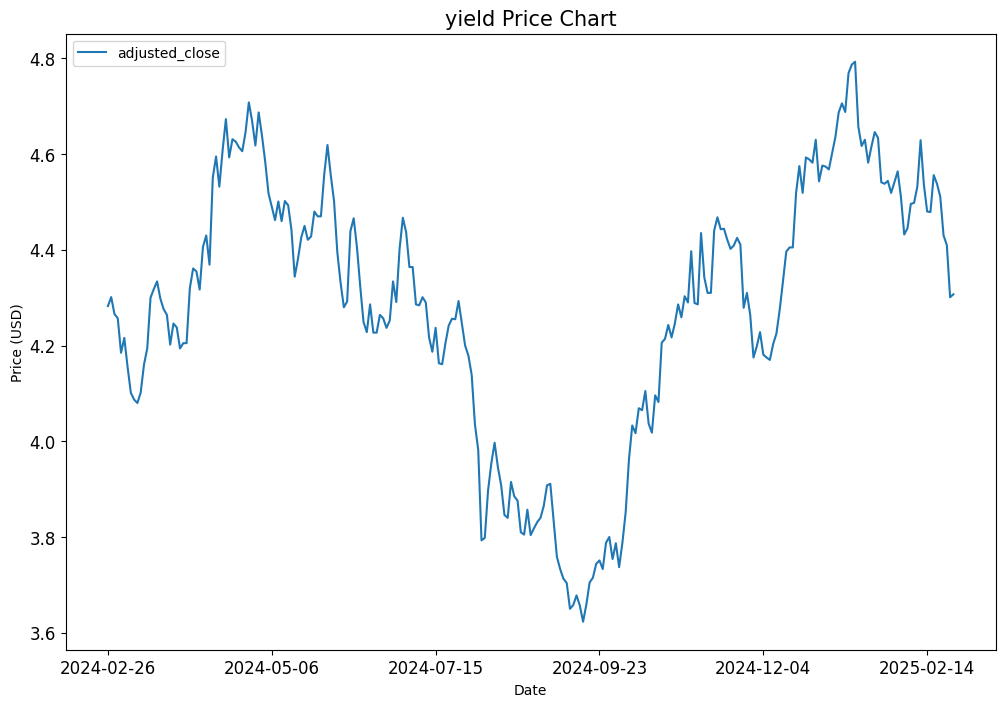

In [31]:
import matplotlib.pyplot as plt
p = us[["date", "adjusted_close"]]
p.set_index("date", inplace=True)
p.plot(figsize = (12,8), fontsize = 12)
plt.ylabel("Price (USD)")
plt.xlabel("Date")
plt.title("yield Price Chart", fontsize = 15)
plt.show()


In [ ]:
import requests

headers = {
    "Content-Type": "application/json",
    "X-OPENFIGI-APIKEY": key
}

isin = "US36166NAJ28"  # Example ISIN
#isin = "DE000A3KWKY4"
data = [{"idType": "ID_ISIN", "idValue": isin}]

response = requests.post("https://api.openfigi.com/v3/mapping", headers=headers, json=data)
print(response.json())